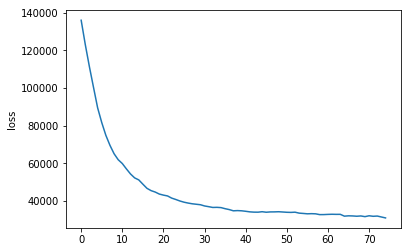

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 27 01:31:06 2017

@author: zax
"""
import numpy as np
import random as rand
import matplotlib.pyplot as plt

def matrix_factorization(R, K, R_test, iterations = 15000, learning_rate = 0.04, lamda = 0.02, step = 200):
    P = np.random.rand(R.shape[0], K)
    Q = np.random.rand(K, R.shape[1])
    p = np.zeros((943))
    q = np.zeros((1682))
    L_validation = np.zeros((int(iterations / step)))
    u = 0
    i = 0
    for t in range(0, iterations):
        while True:
            u = rand.randint(0, 942)
            i = rand.randint(0, 1681)
            if R[u][i] > 0:
                break
            
        eui = R[u][i] - np.dot(P[u, :], Q[:, i])
        
        P[u] = P[u] + learning_rate * (2 * eui * Q[:, i] - lamda * P[u])
        Q[:, i] = Q[:, i] + learning_rate * (2 * eui * P[u] - lamda * Q[:, i])

        if t % step == 0:
            for u in range(0, 943):
                p[u] = lamda * np.linalg.norm(P[u])**2
                
            for i in range(0, 1682):
                q[i] = lamda * np.linalg.norm(Q[:, i])**2
            
            for u in range(0, 943):
                for i in range(0, 1682):
                    if R_test[u][i] > 0:
                        L_validation[int(t / step)] += pow(R_test[u][i] - np.dot(P[u].T, Q[:, i]), 2) + p[u] + q[i]
                        
    return P, Q.T, L_validation
          
R_train = np.zeros((943, 1682))
R_test = np.zeros((943, 1682))
f_base = open('./ml-100k/u1.base', 'rb')
f_test = open('./ml-100k/u1.test', 'rb')
R_t = f_base.read().splitlines()
R_s = f_test.read().splitlines()

for i in range(0, 80000):
    a = R_t[i].split("\t".encode())
    R_train[int(a[0]) - 1][int(a[1]) - 1] = int(a[2])
    
for i in range(0, 20000):
    a = R_s[i].split("\t".encode())
    R_test[int(a[0]) - 1][int(a[1]) - 1] = int(a[2])
    
P, Q, L_validation = matrix_factorization(R_train, 5, R_test)
plt.plot(L_validation)
plt.ylabel('loss')
plt.show()



